In [9]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei')
plt.rcParams['axes.grid'] = False

import numpy as np

#import pandas as pd
#pd.options.display.max_rows = 20

#import sklearn

#import itertools

#import logging
#logger = logging.getLogger()

#from IPython.display import SVG
def show_image(filename, figsize=None, res_dir=True):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

IA2 Sorting and Order Statistics
=================================

### Sort

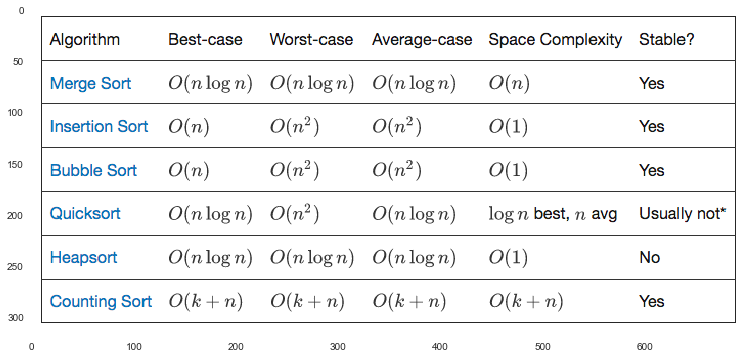

In [8]:
show_image("sort.png", figsize=(15, 6))

In [61]:
from functools import reduce

def check(sort_func, try_max_length=20):
    def run_one_time(size):
        data = np.random.randint(size, size=size)
        res = []
        try:
            res = sort_func(data.copy())
            if reduce(lambda x, y: y if x is not False and x <= y else False, res) is False:
                raise Exception()
            else:
                return True
        except Exception:
            print("Wrong: {}th case:\ndata:{}\nres:{}".format(size, data, res))
            raise
            
    for size in range(1, try_max_length):
        run_one_time(size)
    return True

In [33]:
check(sorted)

True

In [34]:
try:
    check(lambda x: x) # wrong
except Exception as e:
    print(e)

Wrong: 4th case:
data:[0 3 0 3]
res:[0 3 0 3]



#### merge sort

In [84]:
def merge_sort(array):
    size = len(array)
    if size <= 1:
        return array
    mid = size // 2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    return _merge(left, right)

def _merge(a, b):
    res = []
    a_len, b_len = len(a), len(b)
    a_k, b_k = 0, 0
    while a_k < a_len and b_k < b_len:
        a_e, b_e = a[a_k], b[b_k]
        if a_e <= b_e:
            res.append(a_e)
            a_k += 1
        else:
            res.append(b_e)
            b_k += 1
    return res + a[a_k:] + b[b_k:]

In [85]:
test_array = [7, 5, 8, 13, 1]
merge_sort(test_array)

[1, 5, 7, 8, 13]

#### insertion sort

### Order Statistics